In [ ]:
!pip install xgboost

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

In [3]:
from multiscorer.multiscorer import MultiScorer
#Scikit's libraries for demonstration
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC 
from numpy import average
import pickle5 as pickle

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1]:
# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
import umap
import umap.plot

ModuleNotFoundError: No module named 'umap'

In [4]:
import pickle5 as pickle
AMPs_df = pd.read_pickle('/mnt/vdb/thesis/jax/AMPNonAMP.final.reps')

In [5]:
AMPs_df =AMPs_df[AMPs_df["length"] <=30 ]
AMPs_df 

,ID,length,class,reps
1111,"10015_dbaasp,10016_dbaasp|dbaasp_peptides",11,0,"[0.20464208722114563, -0.055944692343473434, 0..."
973,10026_dbaasp|dbaasp_peptides,22,0,"[0.1005186140537262, 0.0014500601682811975, 0...."
524,10029_dbaasp|dbaasp_peptides,14,0,"[0.14606480300426483, 0.04153195396065712, 0.0..."
1979,"1003,1011,1019,1027,1035|CancerPPD_l_natural",20,0,"[0.02989775501191616, -0.004465686157345772, -..."
1917,10030_dbaasp|dbaasp_peptides,18,0,"[0.11731283366680145, 0.022457238286733627, 0...."
...,...,...,...,...
1609,dbAMP_12148,13,0,"[0.2212764024734497, 0.15402714908123016, 0.12..."
617,dbAMP_12158,17,0,"[0.07279127091169357, 0.05830632895231247, -0...."
1051,dbAMP_12161,16,0,"[0.17415067553520203, 0.11548949033021927, 0.0..."
1821,dbAMP_12203,15,0,"[0.03923531994223595, -0.0253727026283741, -0...."


In [5]:
#AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
AMPs_df

,ID,length,class,reps
1272,0_antitbpred|antitbpred,33,0,"[0.020596178248524666, 0.05145363137125969, 0...."
1463,0_peptideDB.anti|peptideDB.anti,148,0,"[0.006680205464363098, -0.09558606147766113, 0..."
712,1000_pos_train_ds3|pos_train_ds3,86,0,"[0.010705528780817986, 0.005044564604759216, 0..."
1111,"10015_dbaasp,10016_dbaasp|dbaasp_peptides",11,0,"[0.20464208722114563, -0.055944692343473434, 0..."
618,10023_dbaasp|dbaasp_peptides,36,0,"[0.0020729468669742346, -0.07690200209617615, ..."
...,...,...,...,...
341,jgi|Zymar1|771619|Za111_scaffold_384_0026,92,0,"[0.006163035519421101, -0.1501017063856125, 0...."
342,jgi|Zymbr1|3072|TI39_contig368g00016T0,769,0,"[0.004322961904108524, -0.039575327187776566, ..."
345,jgi|Zymps1|796288|Zp221_scaffold_1306_00022,790,0,"[0.0037672598846256733, -0.036420367658138275,..."
344,jgi|Zymps1|799992|Zp221_scaffold_243_00026,155,0,"[0.0039311423897743225, -0.01658601127564907, ..."


In [6]:
X= np.array(AMPs_df['reps'].to_list())
y= np.array(AMPs_df['class'].to_list())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

def create_roc_curve(Y, probabilities, class_lookup, title, ax):
    '''Create ROC curve to compare multiclass model performance.
    Parameters:
        Y (numpy.array): Truth labels
        probabilities (numpy.array): Output of model for each class
        class_lookup (dict): lookup hash of truth labels
        title (str): Plot title
    '''
    n_classes = Y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ax.set_title(title)
    if n_classes == 3:
        colors = cycle(['orange', 'red', 'black'])
    else:
        colors = cycle(['orange', 'red', 'aqua', 'black'])
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y[:, i], probabilities[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        ax.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(
                    class_lookup[i], roc_auc[i]))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    # plt.show()

In [9]:
XGBmodel = XGBClassifier( n_jobs=20, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2292
           1       0.89      0.89      0.89      2290

    accuracy                           0.89      4582
   macro avg       0.89      0.89      0.89      4582
weighted avg       0.89      0.89      0.89      4582

Accuracy:0.8921868179834134
[[2046  246]
 [ 248 2042]]


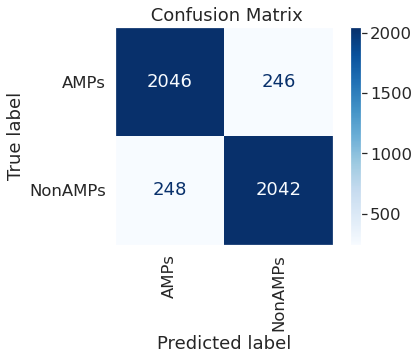

In [10]:
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(XGBmodel, X_test, y_test)

In [11]:
score = cross_val_score(XGBmodel, X_test, y_test, scoring='accuracy', cv=10).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

Cross-Validation Accuracy: 0.9017413272239041 
 



In [11]:
XGBmodel.save_model("best_XGBmodel._30.model")

In [14]:
XGBmodel = XGBClassifier( n_jobs=20, random_state=42, verbosity=1)
cross_val_score(XGBmodel, X, y, cv=10, scoring=scorer )

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [15]:

results_XG = scorer.get_results()
for metric in results_XG.keys():
  print("%s: %.3f" % (metric, average(results_XG[metric])))

accuracy: 0.817
precision: 0.775
recall: 0.924
f1: 0.838
roc_auc: 0.819
neg_log_loss: 6.304


## Evaluate the model